In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("train.csv", index_col=0)
df = df.drop_duplicates()
df = df.drop(columns={"Name","Cabin", "Embarked"})
print(df.columns)
df.head(20)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500
2,1,1,female,38.0,1,0,PC 17599,71.2833
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
4,1,1,female,35.0,1,0,113803,53.1000
5,0,3,male,35.0,0,0,373450,8.0500
6,0,3,male,NaN,0,0,330877,8.4583
7,0,1,male,54.0,0,0,17463,51.8625
8,0,3,male,2.0,3,1,349909,21.0750
9,1,3,female,27.0,0,2,347742,11.1333


In [3]:
print(df.isnull().sum())
print(df.shape)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64
(891, 8)


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
Fareclust = df[["Fare"]]

In [5]:
mmsc = MinMaxScaler(feature_range=(0, 1))
fare_clust = mmsc.fit_transform(Fareclust)
df["Fare"] = fare_clust
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,0.014151
2,1,1,female,38.0,1,0,PC 17599,0.139136
3,1,3,female,26.0,0,0,STON/O2. 3101282,0.015469
4,1,1,female,35.0,1,0,113803,0.103644
5,0,3,male,35.0,0,0,373450,0.015713
6,0,3,male,NaN,0,0,330877,0.016510
7,0,1,male,54.0,0,0,17463,0.101229
8,0,3,male,2.0,3,1,349909,0.041136
9,1,3,female,27.0,0,2,347742,0.021731


In [12]:
fclustering = KMeans(n_clusters=20, random_state=262).fit(Fareclust)
print(fclustering.labels_)
print(metrics.silhouette_score(fare_clust, fclustering.labels_, metric='euclidean'))

[ 5 12  5  6  5  5  6  0 11 17 11  8  5 17  5 11 17 11  0  5  8 11  5 14
  0 17  5  9  5  5  8  4  5  5  2  6  5  5  0 11  5  0  5 14  5  5 11  5
  0  0 14  5  2  8 18 14  5  5  8  6  5  2  2  8  8 11  5  5  5  5  5  6
 12 11 18  5  5  5 17 11  5  5  5  6  5 11 17  5  9  5  5  5 18  0  5  5
 17 18  0  8  5  5  2  5  5  5  5  5  5  8  6 11  5  5 11  5  5  0 19 17
 12  5 17 11  2 11  5  5  0  5  5  5 11  8 11 11  8  6  5  2 11  5 11  5
 11 14  5 17  8 11 11 12  5 11  5 18  5  5  5 12 11 11  5  5 14  0 18  8
  8 18 17 17 11  5 17  5  8  8 11 15 12 11 17 14  0  6 11  8 11  5 11 11
  5  8  8  4  5  5  5 11  5 12  5  5  5  5 11  0  5 17  5  0  5 11  5 10
  5  8  2  5  5 11  5  5 13  5  5  5 11  8  2  5 11 17  5  5  8  8  5 11
 11 11  5  5  5 13  5 11  6  8  5  5  8 11  0 11  2 13  3  8  5 17  2 15
  5  5 14  5  4  7 17 15  0 17  5  2  5 15 17  0  5  5  5  5  8  5  5  5
 11  5  2 13 11  5  5  8  5  4 17 19  5  0 15 11  5  4 10 10  8 18  2  9
  8  5  8  5  8 11  4  7  5  5 11 17 12  7  5 11  0

In [13]:
df['Ticket'] = df['Ticket'].str.replace(r'\D', '')
df = df.replace(r'^\s*$', np.NaN, regex=True)
print(df[["Ticket"]].values)

[['521171']
 ['17599']
 ['23101282']
 ['113803']
 ['373450']
 ['330877']
 ['17463']
 ['349909']
 ['347742']
 ['237736']
 ['9549']
 ['113783']
 ['52151']
 ['347082']
 ['350406']
 ['248706']
 ['382652']
 ['244373']
 ['345763']
 ['2649']
 ['239865']
 ['248698']
 ['330923']
 ['113788']
 ['349909']
 ['347077']
 ['2631']
 ['19950']
 ['330959']
 ['349216']
 ['17601']
 ['17569']
 ['335677']
 ['24579']
 ['17604']
 ['113789']
 ['2677']
 ['52152']
 ['345764']
 ['2651']
 ['7546']
 ['11668']
 ['349253']
 ['2123']
 ['330958']
 ['423567']
 ['370371']
 ['14311']
 ['2662']
 ['349237']
 ['3101295']
 ['439886']
 ['17572']
 ['2926']
 ['113509']
 ['19947']
 ['31026']
 ['2697']
 ['34651']
 ['2144']
 ['2669']
 ['113572']
 ['36973']
 ['347088']
 ['17605']
 ['2661']
 ['29395']
 ['3464']
 ['3101281']
 ['315151']
 ['33111']
 ['2144']
 ['14879']
 ['2680']
 ['1601']
 ['348123']
 ['349208']
 ['374746']
 ['248738']
 ['364516']
 ['345767']
 ['345779']
 ['330932']
 ['113059']
 ['14885']
 ['3101278']
 ['6608']
 ['39208

<ipython-input-13-4cb98c5ea5e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Ticket'] = df['Ticket'].str.replace(r'\D', '')


In [14]:
for k in list(df):
    df["Ticket"]=pd.to_numeric(df["Ticket"], errors='ignore')
df["Ticket"] = df["Ticket"].interpolate(method='linear')
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [15]:
Ticketclust = df[["Ticket"]]
ticket_clust = mmsc.fit_transform(Ticketclust)
df["Ticket"] = ticket_clust
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,0.022560,0.014151
2,1,1,female,38.0,1,0,0.000762,0.139136
3,1,3,female,26.0,0,0,0.999999,0.015469
4,1,1,female,35.0,1,0,0.004926,0.103644
5,0,3,male,35.0,0,0,0.016166,0.015713
6,0,3,male,NaN,0,0,0.014323,0.016510
7,0,1,male,54.0,0,0,0.000756,0.101229
8,0,3,male,2.0,3,1,0.015147,0.041136
9,1,3,female,27.0,0,2,0.015053,0.021731


In [20]:
tclustering = KMeans(n_clusters=14, random_state=262).fit(Ticketclust)
print(tclustering.labels_)
print(metrics.silhouette_score(Ticketclust, tclustering.labels_, metric='euclidean'))

[ 8  0  1  4  7  3  0 11 11  5  9  4 13 11 11  5 12  5 11  9  5  5  3  4
 11 11  9  0  3 11  0  0 11  0  0  4  9 13 11  9  9  0 11  9  3  6  7  0
  9 11  2  6  0  9  4  0 10  9 10  9  9  4 10 11  0  9 10  9  2  3 10  9
  0  9  9 11 11  7  5  7 11 11  3  4  0  2  9 12  0 11 11 11  9  9  7  7
  0  0  5  5 11 11 10  9  2 11 11  3 11  7  4  9  3  9  9  1  7  0  0 11
  0  6  5 10 10  9  7  0  9 11 11  2 13  5 10  9  0  4  9  0  9 11  1  7
  5 10 11  9  5  5  9  4  8  9  5  0 10 12  3  9  7 10 11  3  2  7  4 11
  0  9  4 12 11  1  0 11  9  0  5  4  9  9 11  5  3  4  7  4  7 11  5 10
 11  5  0  0  7  9  7  5 11  9  2  9 13 11  2  9  7  4  2  0  8  5  7 10
  1  5  0  0 12  5  0 11  0  9  9  8  5  9 10 11  5 11 10  9 10 10 10  9
  9  7  0  1  9  0 11  5  0  5  7 11  4 13  7  9  0  4  0  5 12 11  4  4
 12  0  2 11  0  0  4  5  5  0  7  0 11  5 12  9 11 11 11  8  4 11 11 11
  5  7  0  0  9 11 11  0  9  4  0  0  9  7  3  5 13  4  0  0  9  0  0  0
  5 11  0 11  5 10 10  0  8 11  5  5  9  0 11 10  7

In [21]:
df["Ticket"] = tclustering.labels_
df["Fare"] = fclustering.labels_
df.head(60)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,8,5
2,1,1,female,38.0,1,0,0,12
3,1,3,female,26.0,0,0,1,5
4,1,1,female,35.0,1,0,4,6
5,0,3,male,35.0,0,0,7,5
6,0,3,male,NaN,0,0,3,5
7,0,1,male,54.0,0,0,0,6
8,0,3,male,2.0,3,1,11,0
9,1,3,female,27.0,0,2,11,11


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,8,5
2,1,1,0,38.0,1,0,0,12
3,1,3,0,26.0,0,0,1,5
4,1,1,0,35.0,1,0,4,6
5,0,3,1,35.0,0,0,7,5
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,5,11
888,1,1,0,19.0,0,0,4,17
889,0,3,0,NaN,1,2,9,8


In [23]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan, mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
# load dataset
# split into input and output elements
data = df.values
ix = [i for i in range(data.shape[1]) if i != 9]
X, y = data[:, ix], data[:, 7]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
#define modeling pipeline
## model = svm.SVC(kernel='rbf', degree =3, gamma = 0.01, C = 100, max_iter=-1, random_state = 262)
model = RandomForestRegressor()
# fit on the dataset
imputer.fit(X)
# transform the dataset
df = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(df).flatten()))
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Missing: 177
Missing: 0
Mean Accuracy: 1.000 (0.000)


In [24]:
df = pd.DataFrame(df)
df.columns = ["Survived","Pclass","Sex","Age","SibSp","Parch","Ticket","Fare"]

In [25]:
print(df.isnull().sum())
df

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0.0,3.0,1.0,22.000000,1.0,0.0,8.0,5.0
1,1.0,1.0,0.0,38.000000,1.0,0.0,0.0,12.0
2,1.0,3.0,0.0,26.000000,0.0,0.0,1.0,5.0
3,1.0,1.0,0.0,35.000000,1.0,0.0,4.0,6.0
4,0.0,3.0,1.0,35.000000,0.0,0.0,7.0,5.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.000000,0.0,0.0,5.0,11.0
887,1.0,1.0,0.0,19.000000,0.0,0.0,4.0,17.0
888,0.0,3.0,0.0,23.208538,1.0,2.0,9.0,8.0
889,1.0,1.0,1.0,26.000000,0.0,0.0,4.0,17.0


In [26]:
df["Family"] = df["SibSp"] + df["Parch"]
df.loc[df["Family"] > 2, "Family"] = 3
df.loc[df["Family"] == 2, "Family"] = 2
df.loc[df["Family"] == 1, "Family"] = 1
df.loc[df["Family"] == 0, "Family"] = 0
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Family
0,0.0,3.0,1.0,22.000000,1.0,0.0,8.0,5.0,1.0
1,1.0,1.0,0.0,38.000000,1.0,0.0,0.0,12.0,1.0
2,1.0,3.0,0.0,26.000000,0.0,0.0,1.0,5.0,0.0
3,1.0,1.0,0.0,35.000000,1.0,0.0,4.0,6.0,1.0
4,0.0,3.0,1.0,35.000000,0.0,0.0,7.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.000000,0.0,0.0,5.0,11.0,0.0
887,1.0,1.0,0.0,19.000000,0.0,0.0,4.0,17.0,0.0
888,0.0,3.0,0.0,23.208538,1.0,2.0,9.0,8.0,3.0
889,1.0,1.0,1.0,26.000000,0.0,0.0,4.0,17.0,0.0


In [27]:
df.loc[df["Age"] <= 1, "Age"] = 0
df.loc[(df["Age"] > 1) & (df["Age"] <= 10), "Age"] = 1
df.loc[(df["Age"] > 10) & (df["Age"] <= 20), "Age"] = 2
df.loc[(df["Age"] > 20) & (df["Age"] <= 60), "Age"] = 3
df.loc[df["Age"] > 60, "Age"] = 4
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Family
0,0.0,3.0,1.0,3.0,1.0,0.0,8.0,5.0,1.0
1,1.0,1.0,0.0,3.0,1.0,0.0,0.0,12.0,1.0
2,1.0,3.0,0.0,3.0,0.0,0.0,1.0,5.0,0.0
3,1.0,1.0,0.0,3.0,1.0,0.0,4.0,6.0,1.0
4,0.0,3.0,1.0,3.0,0.0,0.0,7.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,3.0,0.0,0.0,5.0,11.0,0.0
887,1.0,1.0,0.0,2.0,0.0,0.0,4.0,17.0,0.0
888,0.0,3.0,0.0,3.0,1.0,2.0,9.0,8.0,3.0
889,1.0,1.0,1.0,3.0,0.0,0.0,4.0,17.0,0.0


In [29]:
X = df[["Pclass","Sex","Age","SibSp","Parch","Ticket","Fare","Family"]]
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Family
0,3.0,1.0,3.0,1.0,0.0,8.0,5.0,1.0
1,1.0,0.0,3.0,1.0,0.0,0.0,12.0,1.0
2,3.0,0.0,3.0,0.0,0.0,1.0,5.0,0.0
3,1.0,0.0,3.0,1.0,0.0,4.0,6.0,1.0
4,3.0,1.0,3.0,0.0,0.0,7.0,5.0,0.0
...,...,...,...,...,...,...,...,...
886,2.0,1.0,3.0,0.0,0.0,5.0,11.0,0.0
887,1.0,0.0,2.0,0.0,0.0,4.0,17.0,0.0
888,3.0,0.0,3.0,1.0,2.0,9.0,8.0,3.0
889,1.0,1.0,3.0,0.0,0.0,4.0,17.0,0.0


In [30]:
y = df[["Survived"]]
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [31]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=262)
X_train = mmsc.fit_transform(X_train)
X_test = mmsc.transform(X_test)
X_train

array([[1.        , 1.        , 0.75      , ..., 0.46153846, 0.26315789,
        0.        ],
       [1.        , 1.        , 0.75      , ..., 0.46153846, 0.42105263,
        0.        ],
       [1.        , 1.        , 0.75      , ..., 0.69230769, 0.26315789,
        0.        ],
       ...,
       [0.        , 0.        , 0.75      , ..., 0.30769231, 0.10526316,
        0.66666667],
       [0.5       , 0.        , 0.75      , ..., 0.38461538, 0.42105263,
        0.33333333],
       [0.5       , 0.        , 0.75      , ..., 0.76923077, 0.26315789,
        0.        ]])

In [85]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score
import sklearn.metrics as metrics
xgb = XGBClassifier(use_label_encoder=False, base_score=0.25, booster='gbtree', eta=0.4, max_depth=5, min_child_weight=6,
                    max_delta_step=0.7, subsample=0.78, colsample_bytree=1, colsample_bylevel=0.7, colsample_bynode=1, 
                    reg_lambda=0, reg_alpha=1, tree_method="exact", sketch_eps=0.1, scale_pos_weight=1.6, 
                    objective="binary:logitraw", gamma=3, n_estimators=5000, rate_drop="0.1", skip_drop="0.05",
                    random_state = 262)
xgb.fit(X_train, y_train)
y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)
print("train precision=", np.round(metrics.precision_score(y_train, y_pred_xgb_train),3))
print("test precision=", np.round(metrics.precision_score(y_test, y_pred_xgb_test),3))
f1_train = f1_score(y_train, y_pred_xgb_train, average='macro')
f1_test = f1_score(y_test, y_pred_xgb_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_xgb_train)
Accuracy_test = accuracy_score(y_test, y_pred_xgb_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

[00:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "rate_drop", "skip_drop" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train precision= 0.885
test precision= 0.792
train f1 score= 0.862
test f1 score= 0.858
train accuracy score= 0.871
test accuracy score= 0.889


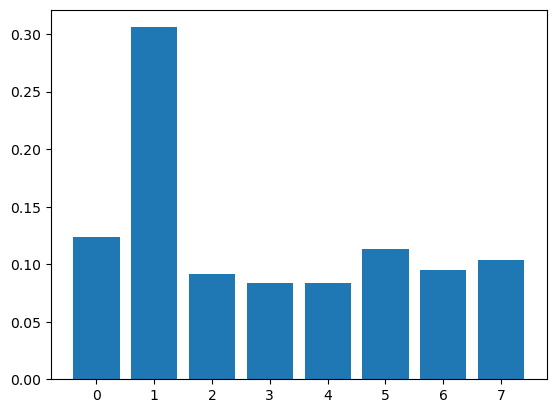

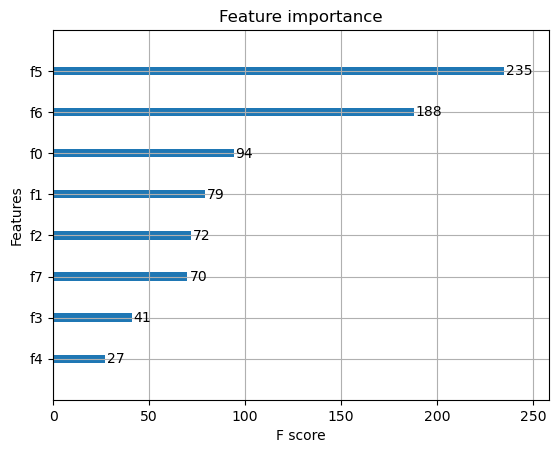

In [86]:
## print(xgb.feature_importances_)
import matplotlib.pyplot as mp
mp.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
mp.show()
# plot feature importance
from xgboost import plot_importance
plot_importance(xgb)
mp.show()

In [87]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', degree =2, gamma = 0.5, C = 610, max_iter=-1, random_state = 262) 

#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_svm_train = clf.predict(X_train)
y_pred_svm_test = clf.predict(X_test)
print(np.round(metrics.precision_score(y_train, y_pred_svm_train),3))
print(np.round(metrics.precision_score(y_test, y_pred_svm_test),3))
Accuracy_train = accuracy_score(y_train, y_pred_svm_train)
Accuracy_test = accuracy_score(y_test, y_pred_svm_test)
f1_train = f1_score(y_train, y_pred_svm_train, average='macro')
f1_test = f1_score(y_test, y_pred_svm_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))


0.852
0.655
train f1 score= 0.87
test f1 score= 0.799
train accuracy score= 0.876
test accuracy score= 0.833


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a svm Classifier#
clfrf=RandomForestClassifier(n_estimators=20, criterion="entropy", max_depth=5,
    min_samples_split=11, min_samples_leaf=1, min_weight_fraction_leaf=0.01, max_features='auto', max_leaf_nodes=10,
    min_impurity_decrease=0.05, min_impurity_split=0.05, bootstrap=True, oob_score=False, n_jobs=-1,
    verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.01, max_samples=80, random_state = 262)

# Train the model using the training sets y_pred=clf.predict(X_test)
clfrf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred_rf_train = clfrf.predict(X_train)
y_pred_rf_test = clfrf.predict(X_test)
print(metrics.precision_score(y_train, y_pred_rf_train))
print(metrics.precision_score(y_test, y_pred_rf_test))
f1_train = f1_score(y_train, y_pred_rf_train, average='macro')
f1_test = f1_score(y_test, y_pred_rf_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_rf_train)
Accuracy_test = accuracy_score(y_test, y_pred_rf_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

0.8901734104046243
0.8125
train f1 score= 0.731
test f1 score= 0.775
train accuracy score= 0.772
test accuracy score= 0.844


<ipython-input-242-7fbfad5bea78>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clfrf.fit(X_train,y_train)
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in versio

In [243]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='gbdt', num_leaves=20, max_depth=-1, learning_rate=0.1, n_estimators=10000,
    subsample_for_bin=30, objective="binary", class_weight={0:1, 1:1.6}, min_split_gain=0.1, min_child_weight=0.001,
    min_child_samples=20, subsample=0.7, subsample_freq=0, colsample_bytree=1, reg_alpha=1, reg_lambda=0,
    n_jobs=-1, silent=True, importance_type='split', random_state=262)
lgbm.fit(X_train, y_train)
y_pred_lgbm_train = lgbm.predict(X_train)
y_pred_lgbm_test = lgbm.predict(X_test)
print("train precision=", np.round(metrics.precision_score(y_train, y_pred_lgbm_train),3))
print("test precision=", np.round(metrics.precision_score(y_test, y_pred_lgbm_test),3))
f1_train = f1_score(y_train, y_pred_lgbm_train, average='macro')
f1_test = f1_score(y_test, y_pred_lgbm_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_lgbm_train)
Accuracy_test = accuracy_score(y_test, y_pred_lgbm_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


train precision= 0.741
test precision= 0.515
train f1 score= 0.817
test f1 score= 0.705
train accuracy score= 0.821
test accuracy score= 0.744


In [88]:
dft = pd.read_csv("test.csv", index_col=0)
dft = dft.drop(columns={"Name","Cabin", "Embarked"})
dft['Ticket'] = dft['Ticket'].str.replace(r'\D', '')
dft = dft.replace(r'^\s*$', np.NaN, regex=True)
print(dft[["Ticket"]].values)

[['330911']
 ['363272']
 ['240276']
 ['315154']
 ['3101298']
 ['7538']
 ['330972']
 ['248738']
 ['2657']
 ['448871']
 ['349220']
 ['694']
 ['21228']
 ['24065']
 ['5734']
 ['2167']
 ['233734']
 ['2692']
 ['23101270']
 ['2696']
 ['17603']
 ['17368']
 ['17598']
 ['17597']
 ['17608']
 ['53337']
 ['113509']
 ['2698']
 ['113054']
 ['2662']
 ['3085']
 ['31029']
 ['2315']
 ['6607']
 ['13236']
 ['2682']
 ['342712']
 ['315087']
 ['345768']
 ['1601']
 ['349256']
 ['113778']
 ['3101263']
 ['237249']
 ['11753']
 ['23101291']
 ['17594']
 ['370374']
 ['11813']
 ['37671']
 ['13695']
 ['2168']
 ['29105']
 ['19950']
 ['32861']
 ['382652']
 ['349230']
 ['348122']
 ['386525']
 ['17608']
 ['349232']
 ['237216']
 ['347090']
 ['334914']
 ['17608']
 ['13534']
 ['330963']
 ['113796']
 ['2543']
 ['19950']
 ['382653']
 ['349211']
 ['3101297']
 ['17562']
 ['113503']
 ['113503']
 ['359306']
 ['11770']
 ['248744']
 ['368702']
 ['2678']
 ['17483']
 ['19924']
 ['349238']
 ['240261']
 ['2660']
 ['330844']
 ['431416']


In [89]:
for k in list(dft):
    dft["Ticket"]=pd.to_numeric(dft["Ticket"], errors='ignore')
dft["Ticket"] = dft["Ticket"].interpolate(method='linear')
dft.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Ticket     0
Fare       1
dtype: int64

In [90]:
Ticketclust2 = dft[["Ticket"]]
dft["Ticket"] = tclustering.predict(Ticketclust2)
dft

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,
892,3,male,34.5,0,0,3,7.8292
893,3,female,47.0,1,0,7,7.0000
894,2,male,62.0,0,0,5,9.6875
895,3,male,27.0,0,0,3,8.6625
896,3,female,22.0,1,1,2,12.2875
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,13,8.0500
1306,1,female,39.0,0,0,0,108.9000
1307,3,male,38.5,0,0,2,7.2500


In [91]:
dft["Fare"] = dft["Fare"].interpolate(method='linear')
dft.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Ticket     0
Fare       0
dtype: int64

In [92]:
Faretclust2 = dft[["Fare"]]
dft["Fare"] = fclustering.predict(Faretclust2)
dft.head(20)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,
892,3,male,34.5,0,0,3,5
893,3,female,47.0,1,0,7,5
894,2,male,62.0,0,0,5,5
895,3,male,27.0,0,0,3,5
896,3,female,22.0,1,1,2,11
897,3,male,14.0,0,0,9,5
898,3,female,30.0,0,0,3,5
899,2,male,26.0,1,1,5,17
900,3,female,18.0,0,0,9,5


In [93]:
le = LabelEncoder()
dft['Sex'] = le.fit_transform(dft['Sex'])
dft

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,
892,3,1,34.5,0,0,3,5
893,3,0,47.0,1,0,7,5
894,2,1,62.0,0,0,5,5
895,3,1,27.0,0,0,3,5
896,3,0,22.0,1,1,2,11
...,...,...,...,...,...,...,...
1305,3,1,NaN,0,0,13,5
1306,1,0,39.0,0,0,0,10
1307,3,1,38.5,0,0,2,5


In [94]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan, mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
# load dataset
# split into input and output elements
data = dft.values
ix = [i for i in range(data.shape[1]) if i != 9]
X, y = data[:, ix], data[:, 5]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
#define modeling pipeline
## model = svm.SVC(kernel='rbf', degree =3, gamma = 0.01, C = 100, max_iter=-1, random_state = 262)
model = RandomForestRegressor()
# fit on the dataset
imputer.fit(X)
# transform the dataset
dft = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(dft).flatten()))
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Missing: 86
Missing: 0
Mean Accuracy: 1.000 (0.001)


In [95]:
dft = pd.DataFrame(dft)
dft.columns = ["Pclass","Sex","Age","SibSp","Parch","Ticket","Fare"]
dft

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3.0,1.0,34.500000,0.0,0.0,3.0,5.0
1,3.0,0.0,47.000000,1.0,0.0,7.0,5.0
2,2.0,1.0,62.000000,0.0,0.0,5.0,5.0
3,3.0,1.0,27.000000,0.0,0.0,3.0,5.0
4,3.0,0.0,22.000000,1.0,1.0,2.0,11.0
...,...,...,...,...,...,...,...
413,3.0,1.0,24.250697,0.0,0.0,13.0,5.0
414,1.0,0.0,39.000000,0.0,0.0,0.0,10.0
415,3.0,1.0,38.500000,0.0,0.0,2.0,5.0
416,3.0,1.0,25.476081,0.0,0.0,7.0,5.0


In [96]:
dft.loc[dft["Age"] <= 1, "Age"] = 0
dft.loc[(dft["Age"] > 1) & (dft["Age"] <= 10), "Age"] = 1
dft.loc[(dft["Age"] > 10) & (dft["Age"] <= 20), "Age"] = 2
dft.loc[(dft["Age"] > 20) & (dft["Age"] <= 60), "Age"] = 3
dft.loc[dft["Age"] > 60, "Age"] = 4
dft

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3.0,1.0,3.0,0.0,0.0,3.0,5.0
1,3.0,0.0,3.0,1.0,0.0,7.0,5.0
2,2.0,1.0,4.0,0.0,0.0,5.0,5.0
3,3.0,1.0,3.0,0.0,0.0,3.0,5.0
4,3.0,0.0,3.0,1.0,1.0,2.0,11.0
...,...,...,...,...,...,...,...
413,3.0,1.0,3.0,0.0,0.0,13.0,5.0
414,1.0,0.0,3.0,0.0,0.0,0.0,10.0
415,3.0,1.0,3.0,0.0,0.0,2.0,5.0
416,3.0,1.0,3.0,0.0,0.0,7.0,5.0


In [97]:
dft["Family"] = dft["SibSp"] + dft["Parch"]
dft.loc[dft["Family"] > 2, "Family"] = 3
dft.loc[dft["Family"] == 2, "Family"] = 2
dft.loc[dft["Family"] == 1, "Family"] = 1
dft.loc[dft["Family"] == 0, "Family"] = 0
dft

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Family
0,3.0,1.0,3.0,0.0,0.0,3.0,5.0,0.0
1,3.0,0.0,3.0,1.0,0.0,7.0,5.0,1.0
2,2.0,1.0,4.0,0.0,0.0,5.0,5.0,0.0
3,3.0,1.0,3.0,0.0,0.0,3.0,5.0,0.0
4,3.0,0.0,3.0,1.0,1.0,2.0,11.0,2.0
...,...,...,...,...,...,...,...,...
413,3.0,1.0,3.0,0.0,0.0,13.0,5.0,0.0
414,1.0,0.0,3.0,0.0,0.0,0.0,10.0,0.0
415,3.0,1.0,3.0,0.0,0.0,2.0,5.0,0.0
416,3.0,1.0,3.0,0.0,0.0,7.0,5.0,0.0


In [98]:
dft = dft[["Pclass","Sex","Age","SibSp","Parch","Ticket","Fare","Family"]]
dft = mmsc.fit_transform(dft)
dft

array([[1.        , 1.        , 0.75      , ..., 0.23076923, 0.26315789,
        0.        ],
       [1.        , 0.        , 0.75      , ..., 0.53846154, 0.26315789,
        0.33333333],
       [0.5       , 1.        , 1.        , ..., 0.38461538, 0.26315789,
        0.        ],
       ...,
       [1.        , 1.        , 0.75      , ..., 0.15384615, 0.26315789,
        0.        ],
       [1.        , 1.        , 0.75      , ..., 0.53846154, 0.26315789,
        0.        ],
       [1.        , 1.        , 0.75      , ..., 0.69230769, 0.        ,
        0.66666667]])

In [99]:
y_pred_xgb = pd.DataFrame(np.round(xgb.predict(dft),0))
y_pred_xgb.to_csv("xgb_final_cluster.csv")